In [27]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing 
from keras import models, layers, optimizers

import matplotlib.pyplot as plt

In [28]:
# Descargando datos
(train_data , train_labels) ,(test_data,test_labels) = boston_housing.load_data()

In [29]:
train_data.shape

(404, 13)

In [30]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

##### Como los datos están muy dispersos lo ideal es normalizarlos

In [31]:
# Normalización. Restamos la media y dividimos por la desviacion estándar
mean = train_data.mean(axis=0)
train_data = train_data  - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

#### Definiendo nuestra red

In [49]:
def build_model_regression(lr_var, input_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizers.RMSprop(learning_rate=lr_var), loss='mse',metrics=['mae'])
    return model

In [50]:
# K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epoch = 85
all_history = []

In [51]:
for i in range(k):
    print(f"Fold: {i}")
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_labels[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]
        ],
        axis= 0   
    )
    
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_targets[(i+1) * num_val_samples:]
        ],
        axis= 0   
    )
    
    model = build_model_regression(0.001, 13)
    
    history = model.fit(partial_train_data, partial_train_targets,
                        epochs=num_epoch,
                        batch_size = 16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    
    all_history.append(history.history['val_mae'])

Fold: 0
Fold: 1
Fold: 2
Fold: 3


In [52]:
# Media de todos los MAE
len(all_history[0])

85

In [53]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [54]:
all_mae_avg

0     18.850383
1     15.010241
2     10.711719
3      7.417292
4      5.758728
        ...    
80     2.437045
81     2.322282
82     2.373943
83     2.376113
84     2.374381
Length: 85, dtype: float64

In [55]:
pd.DataFrame(all_history)

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,18.074659,14.624436,10.696471,7.206732,5.490335,4.491255,3.761305,3.280477,3.082774,2.904369,...,1.894891,1.994677,1.981812,2.160269,1.879678,2.037207,1.881471,1.918543,1.934612,2.032457
1,18.374514,14.393435,9.755490,6.480984,5.336844,4.553679,4.037068,3.918506,3.365011,3.396238,...,2.496578,2.676149,2.529204,2.628595,2.661056,2.722844,2.486958,2.660410,2.505333,2.607814
2,19.038244,16.170408,12.710048,9.123694,6.692695,5.405135,4.624001,4.098266,3.770182,3.539875,...,2.500546,2.492041,2.553562,2.466121,2.460981,2.483243,2.461299,2.488076,2.487607,2.443550
3,19.914114,14.852682,9.684865,6.857759,5.515038,4.688776,4.172255,4.020261,3.784019,3.609055,...,2.494989,2.424215,2.417196,2.467235,2.497429,2.504886,2.459399,2.428741,2.576899,2.413701


#### Visualizando resultados

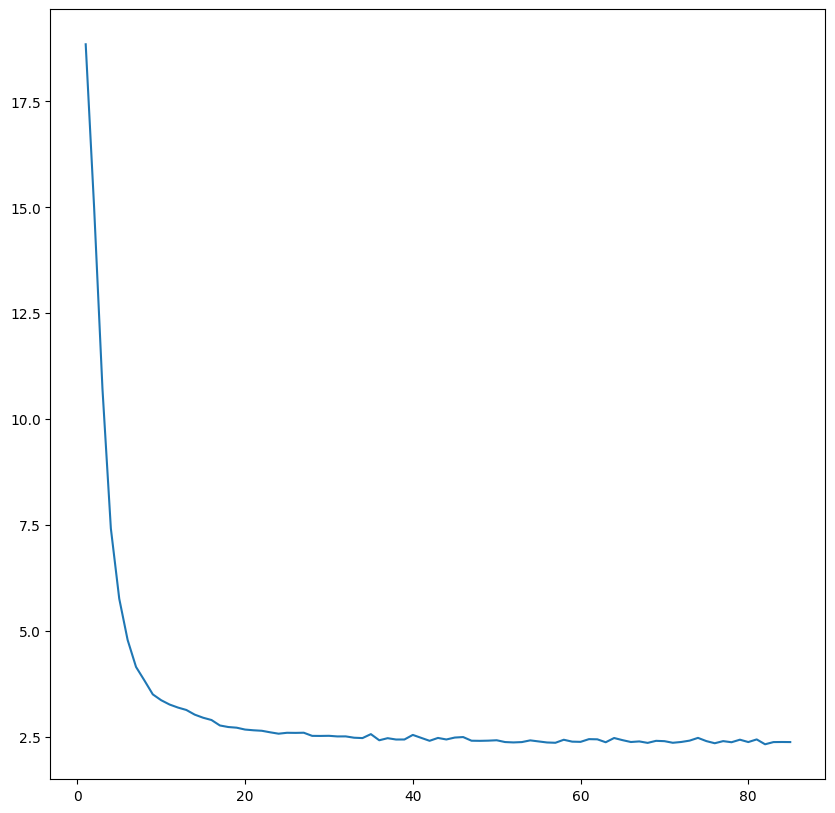

In [56]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg)+1), all_mae_avg)
plt.show()

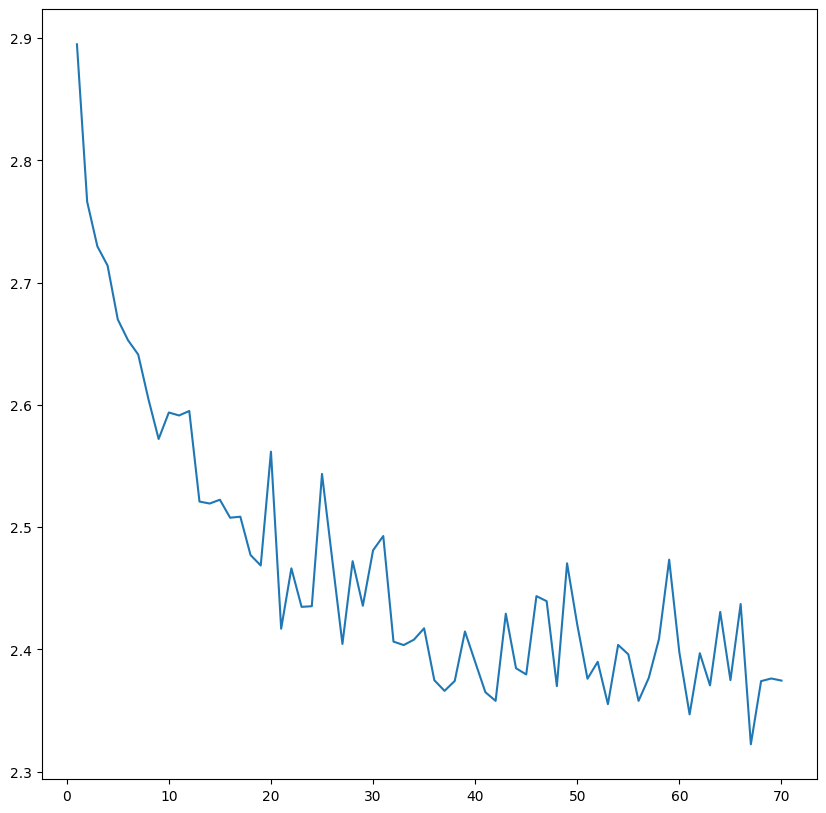

In [57]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

#### Evaluando el modelo

In [58]:
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 21.3864 - mae: 2.9025


[21.386445999145508, 2.90248441696167]